### aim: 

### date: 

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [4]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [5]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

## raw data

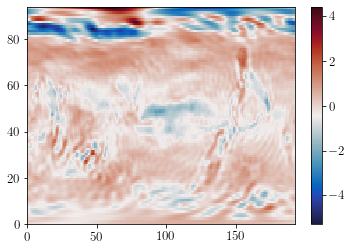

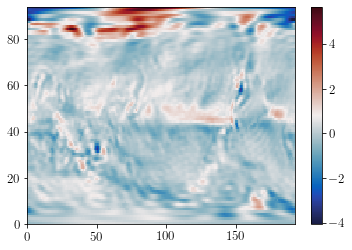

In [12]:
doedir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/'
ndoe = xr.open_dataset(f'{doedir}/windU/uwnd.10m.gauss.1980.nc')


ncardir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/'
nncar = xr.open_dataset(f'{ncardir}/windU/uwnd.10m.gauss.1980.nc')

plt.figure()
q = plt.pcolormesh(ndoe.uwnd.squeeze().mean(dim = 'time')-nncar.uwnd.squeeze().mean(dim = 'time'), cmap = cm.balance)
plt.colorbar(q)

##

doedir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/'
ndoe = xr.open_dataset(f'{doedir}/windV/vwnd.10m.gauss.1980.nc')


ncardir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/'
nncar = xr.open_dataset(f'{ncardir}/windV/vwnd.10m.gauss.1980.nc')

plt.figure()
q = plt.pcolormesh(ndoe.vwnd.squeeze().mean(dim = 'time')-nncar.vwnd.squeeze().mean(dim = 'time'), cmap = cm.balance)
plt.colorbar(q)

dairly

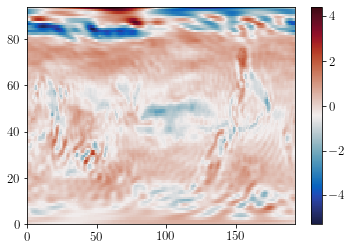

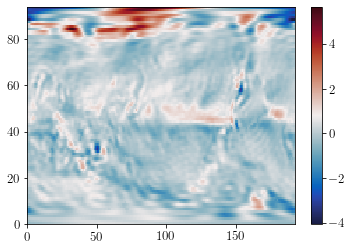

In [13]:
doedir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/'
ndoe = xr.open_dataset(f'{doedir}/daily/uwnd.10m.gauss.1980_daily.nc')


ncardir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/'
nncar = xr.open_dataset(f'{ncardir}/daily/uwnd.10m.gauss.1980_daily.nc')

plt.figure()
q = plt.pcolormesh(ndoe.uwnd.squeeze().mean(dim = 'time')-nncar.uwnd.squeeze().mean(dim = 'time'), cmap = cm.balance)
plt.colorbar(q)

##

doedir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/'
ndoe = xr.open_dataset(f'{doedir}/daily/vwnd.10m.gauss.1980_daily.nc')


ncardir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/'
nncar = xr.open_dataset(f'{ncardir}/daily/vwnd.10m.gauss.1980_daily.nc')

plt.figure()
q = plt.pcolormesh(ndoe.vwnd.squeeze().mean(dim = 'time')-nncar.vwnd.squeeze().mean(dim = 'time'), cmap = cm.balance)
plt.colorbar(q)

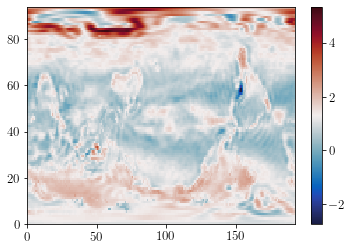

In [15]:
doedir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/'
ndoe = xr.open_dataset(f'{doedir}/daily/wspd.10m.gauss.1980_daily.nc')


ncardir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/'
nncar = xr.open_dataset(f'{ncardir}/daily/wspd.10m.gauss.1980_daily.nc')

plt.figure()
q = plt.pcolormesh(ndoe.windspeed.squeeze().mean(dim = 'time')-nncar.windspeed.squeeze().mean(dim = 'time'), cmap = cm.balance)
plt.colorbar(q)

##

In [18]:
y = 1980
for y in range(1980,2024):
    ncepdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/'
    nncar = xr.open_dataset(f'{ncepdir}/daily/uwnd.10m.gauss.{y}_daily.nc')
    ncepdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/'
    ndoe = xr.open_dataset(f'{ncepdir}/daily/uwnd.10m.gauss.{y}_daily.nc')
    
    duwnd = ndoe.uwnd.squeeze()
    nuwnd = nncar.uwnd.squeeze()

    dmuwnd = np.abs(duwnd.mean(dim = 'time').values)
    nmuwnd = np.abs(nuwnd.mean(dim = 'time').values)

    # q = plt.pcolormesh(dmuwnd - nmuwnd, cmap = cm.balance)
    # plt.colorbar(q)
    tv = dmuwnd - nmuwnd
    print(f'{y} {np.nanmean(tv[30,:])}')

1980 0.24871033430099487
1981 0.20054133236408234
1982 0.17988944053649902
1983 0.2875969409942627
1984 0.20149533450603485
1985 0.23763485252857208
1986 0.225660040974617
1987 0.21841919422149658
1988 0.23487628996372223
1989 0.17577891051769257
1990 0.17639851570129395
1991 0.255130410194397
1992 0.20660392940044403
1993 0.2600991725921631
1994 0.1952742338180542
1995 0.27548322081565857
1996 0.22629325091838837
1997 0.2693408727645874
1998 0.21123230457305908
1999 0.22193700075149536
2000 0.18598420917987823
2001 0.2071579545736313
2002 0.1963551789522171
2003 0.17854662239551544
2004 0.19914913177490234
2005 0.25975683331489563
2006 0.197496697306633
2007 0.20621295273303986
2008 0.20630593597888947
2009 0.1743374466896057
2010 0.24189810454845428
2011 0.21889616549015045
2012 0.21356511116027832
2013 0.20327721536159515
2014 0.22156555950641632
2015 0.1841457337141037
2016 0.15164488554000854
2017 0.17323088645935059
2018 0.14373421669006348
2019 0.19788557291030884
2020 0.2421745

In [21]:
print(np.sqrt(2.2**2 + 2.2**2))
print(np.sqrt(2.**2 + 2.**2))

3.111269837220809
2.8284271247461903


In [17]:
y = 1980
for y in range(1980,2024):
    ncepdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/'
    nncar = xr.open_dataset(f'{ncepdir}/daily/vwnd.10m.gauss.{y}_daily.nc')
    ncepdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/'
    ndoe = xr.open_dataset(f'{ncepdir}/daily/vwnd.10m.gauss.{y}_daily.nc')
    
    duwnd = ndoe.vwnd.squeeze()
    nuwnd = nncar.vwnd.squeeze()

    dmuwnd = np.abs(duwnd.mean(dim = 'time').values)
    nmuwnd = np.abs(nuwnd.mean(dim = 'time').values)

    # q = plt.pcolormesh(dmuwnd - nmuwnd, cmap = cm.balance)
    # plt.colorbar(q)
    tv = dmuwnd - nmuwnd
    print(f'{y} {np.nanmean(tv[30,:])}')

1980 0.1653391718864441
1981 0.13303165137767792
1982 0.16756665706634521
1983 0.1291770190000534
1984 0.2061951905488968
1985 0.15179847180843353
1986 0.15500392019748688
1987 0.18176023662090302
1988 0.1536742001771927
1989 0.17161083221435547
1990 0.17796887457370758
1991 0.18994589149951935
1992 0.17311866581439972
1993 0.1819564253091812
1994 0.1469491422176361
1995 0.11856762319803238
1996 0.17219491302967072
1997 0.10740926116704941
1998 0.15368832647800446
1999 0.15701700747013092
2000 0.15836897492408752
2001 0.15399231016635895
2002 0.15149497985839844
2003 0.17180056869983673
2004 0.16736572980880737
2005 0.18888401985168457
2006 0.21350951492786407
2007 0.2070050835609436
2008 0.21652479469776154
2009 0.20373229682445526
2010 0.18753893673419952
2011 0.24446432292461395
2012 0.2650097608566284
2013 0.23315024375915527
2014 0.24621444940567017
2015 0.2344612330198288
2016 0.2361430525779724
2017 0.20991671085357666
2018 0.22372175753116608
2019 0.22199851274490356
2020 0.165

In [ ]:
y = 1980
for y in range(1980,2024):
    ncepdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/'
    nncar = xr.open_dataset(f'{ncepdir}/daily/wspd.10m.gauss.{y}_daily.nc')
    ncepdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/'
    ndoe = xr.open_dataset(f'{ncepdir}/daily/wspd.10m.gauss.{y}_daily.nc')
    
    duwnd = ndoe.windspeed.squeeze()
    nuwnd = nncar.windspeed.squeeze()

    dmuwnd = duwnd.mean(dim = 'time')
    nmuwnd = nuwnd.mean(dim = 'time')

    # q = plt.pcolormesh(dmuwnd - nmuwnd, cmap = cm.balance)
    # plt.colorbar(q)
    tv = dmuwnd - nmuwnd
    print(f'{y} {np.nanmean(tv[30,:])}')